# SVM中使用多项式特征

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
X,y = datasets.make_moons()#自行生成数据集

In [3]:
X.shape

(100, 2)

In [4]:
y.shape

(100,)

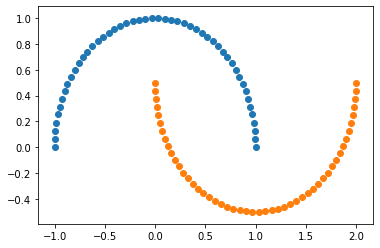

In [5]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [6]:
X, y =datasets.make_moons(noise=0.15,random_state=666)#增加标准差为0.15的噪音，随机种子666

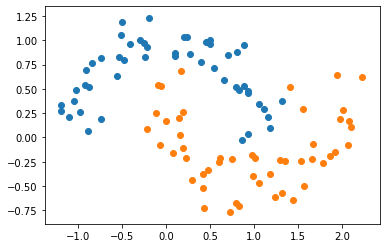

In [7]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

# 使用带有多项式特征的SVM

In [8]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
def PolynomialSVC(degree_param):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree_param)),
        ("std_scaler",StandardScaler()),
        ("linearSVC",LinearSVC())
    ])

In [9]:
poly_svc=PolynomialSVC(degree_param=3)#4阶多项式

In [10]:
poly_svc.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearSVC',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [11]:
def plot_decision_boundry(model,axis):#axis是坐标轴范围
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*200)),#x轴划分为很多小的点用最大值减最小值*100这么多样本点
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*200))#将y轴划分为很多小的点
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]#按行连接两个矩阵
    y_predict=model.predict(X_new)
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#EF9A9a','#fff59d','#90caf9'])
    plt.contourf(x0,x1,zz,cmap=custom_cmap)#可选参数linwidth

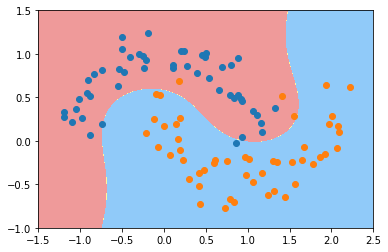

In [12]:
plot_decision_boundry(poly_svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()#利用多项式，使得决策边界变为了多项式

# 使用多项式核函数的SVM

In [13]:
from sklearn.svm import SVC
def PolynomialKernalSVC(degree_param,C=1.0):
    return Pipeline([
        ("std_scaler",StandardScaler()),
        ("kernalSVC",SVC(kernel="poly",degree=3,C=C))#利用kernal参数，让SVM自动对数据进行多项式化处理
    ])

In [14]:
poly_kernal_svc= PolynomialKernalSVC(degree_param=3)
poly_kernal_svc.fit(X,y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kernalSVC',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

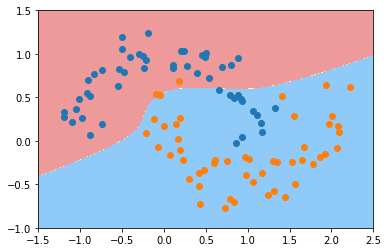

In [15]:
plot_decision_boundry(poly_kernal_svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()#与使用pipeline的效果 存在一定差异，说明kernel与正常的算法有一定的差异